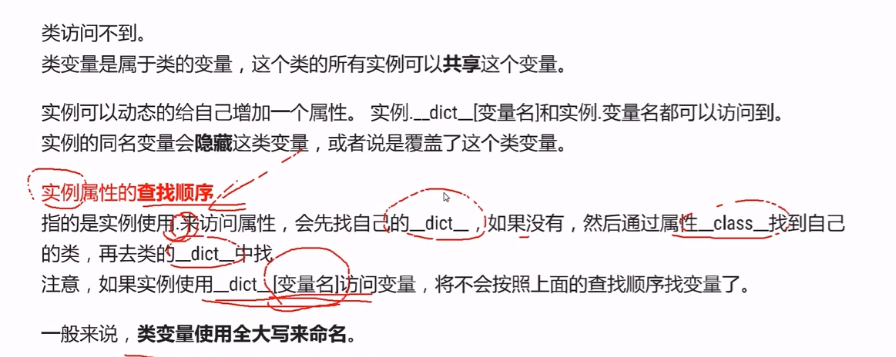

In [1]:
def setnameproperty(name):
    def wrapper(cls): 
        cls.name = name 
        return cls
    return wrapper
@setnameproperty('My class') #MyClass=setnameproperty('My class')(MyClass)
class MyClass:
    pass

In [2]:
a=setnameproperty('my class')(MyClass)
a.name

'my class'

In [34]:
b=MyClass
b.name='hello'

In [35]:
b.name

'hello'

In [47]:
def add(x,y,*args,z,**kwargs):
    print(x,y,args,z,kwargs)
add(4,5,6,8,9,z=3,i=6,h=0)

4 5 (6, 8, 9) 3 {'i': 6, 'h': 0}


考虑 如果不加def copy的函数  打印add的name和doc有什么区别（删除第15行）

In [13]:
import datetime
import time
def logger(fn):
    def warp(*args,**kwargs):
        '''this is a wrapper'''
        print("args={},kwargs={}".format(args, kwargs))
        start = datetime.datetime.now()
        ret = fn(*args, **kwargs)
        # after
        delta = (datetime.datetime.now() - start).total_seconds()
        if delta > 2:
            print("{} took {}s".format(fn.__name__,delta))
        return ret
    return  warp
@logger #相当于 add = logger（add)
def add(x,y):
    time.sleep(2)
    return x+y




In [ ]:
#foo=logger(add)
#print(type(foo))
#print(foo(4,6))
#add = logger(add) #当将add这个函数传给fn后，add就给这个add给覆盖了,从而指向warp
#print(add(4,6))
print(add(4,6))
print(add.__name__,add.__doc__)

### 带参装饰器

In [12]:
import datetime
import time

def logger(t):# def logger(t1, t2, t3....tn):
    def _logger(fn):
        #@copy_properties(fn) 可以把上面写的复制属性的函数装饰在此
        def wrap(*args, **kwargs):
            #before 功能增强
            # print("args={},kwargs={}".format(args, kwargs))
            start = datetime.datetime.now()
            ret = fn(*args, **kwargs)
            #after 功能增强
            duration = (datetime.datetime.now() - start).total_seconds()
            if duration > t:
                print("function {} took {}s.".format(fn.__name__, duration))
            return ret
        return wrap
    return _logger

@logger(3)# add = logger(3)(add), @logger(3, 5, 9,...n)
def add(x, y):
    print("======call add======")
    time.sleep(5)
    return x + y

print(add(4, y=5))

## 属性装饰器 

In [81]:
class Person:
    def __init__(self,chi,eng,his):
        self._chi=chi
        self._eng=eng
        self.__his=his
    def getscore(self):
        return(self._chi,self._eng,self.__his)
    
    def gethis(self):#只读属性
        return self.__his
    def sethis(self,values):
        self.__his=values
    def geteng(self):
        return self._eng
    @property
    def chinese(self):#只读属性
        return self._chi

In [82]:
student1 = Person(80,90,100)
student1.getscore()

(80, 90, 100)

In [20]:
print(student1.chinese)#注意这里没有加括号进行调用，所以叫属性装饰器

TypeError: 'int' object is not callable

In [77]:
student1.__dict__

{'_chi': 80, '_eng': 90, '_Person__his': 100}

In [78]:
student1.__class__.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Person.__init__(self, chi, eng, his)>,
              'getscore': <function __main__.Person.getscore(self)>,
              'gethis': <function __main__.Person.gethis(self)>,
              'sethis': <function __main__.Person.sethis(self, values)>,
              'geteng': <function __main__.Person.geteng(self)>,
              'chinese': <property at 0x67e39a8>,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None})

In [21]:
class Person:
    def __init__(self,chi,eng,his):
        self._chi=chi
        self._eng=eng
        self.__his=his
    def getscore(self):
        return(self._chi,self,_eng,self.__his)
    
    def gethis(self):#只读属性
        return self.__his
    def sethis(self,values):
        self.__his=values
    def geteng(self):
        return self._eng
    @property
    def chinese(self):#只读属性
        return self._chi
    @chinese.setter
    def chinese(self,value):
        self._chi=value

In [22]:
student1 = Person(80,90,100)
student1.chinese=120 #动态增加了属性
print(student1.chinese)

120


### 属性删除

In [24]:
class Person:
    def __init__(self,chi,eng,his):
        self._chi=chi
        self._eng=eng
        self.__his=his
    def getscore(self):
        return(self._chi,self,_eng,self.__his)
    
    def gethis(self):#只读属性
        return self.__his
    def sethis(self,values):
        self.__his=values
    def geteng(self):
        return self._eng
    @property
    def chinese(self):#只读属性
        return self._chi
    @chinese.setter
    def chinese(self,value):
        self._chi=value
    @chinese.deleter
    def chinese(self):
        #del self._chi
        print('del self_chi')
            

In [26]:
student1 = Person(80,90,100)
del student1.chinese

del self_chi


In [27]:
@property?


In [28]:
(@property)

SyntaxError: invalid syntax (<ipython-input-28-e4338b7d84a1>, line 1)

In [6]:
class Person:
    def __init__(self,chi,eng,his):
        self._chi=chi
        self._eng=eng
        self.__his=his
    def getscore(self):
        return(self._chi,self,_eng,self.__his)
    
    def gethis(self):#只读属性
        return self.__his
    def sethis(self,values):
        self.__his=values
    def geteng(self):
        return self._eng
    
    his=property(gethis,sethis)
    

In [7]:
tom=Person(80,80,100)

In [8]:
print(tom.his)

100


In [9]:
tom.his=120

In [10]:
print(tom.his)

120


In [3]:
class Person:
    def __init__(self,chi,eng,his):
        self._chi=chi
        self._eng=eng
        self.__his=his
    def getscore(self):
        return(self._chi,self,_eng,self.__his)
    
    def sethis(self,values):
        self.__his=values
    def geteng(self):
        return self._eng
    
    his=property(lambda self:self.__his,sethis)#利用lanmbda函数还进行get

In [4]:
tom=Person(80,80,100)

In [6]:
tom.sethis(120)
tom.his

120

In [13]:
tom.his

100

In [14]:
tom.his=120
print(tom.his)

120


In [35]:
def fun():
    for i in range(20):
        x=yield i
        print('good',x)

In [36]:
a=fun()

In [37]:
a.__next__()

0

In [40]:
import random

In [41]:
c=a.send(200)
print(c)

good 200
3


In [46]:
class A():
    def __init__(self,):
        super().__init__()
        self.a = self.funa()
    def funa(self):
        print("funa is runing...")

aaa = A()

funa is runing...


In [59]:
class Temperature:
    func=None
    def __init__(self,Temp,unit):
        self.temp=Temp
        self.unit=unit
        self.judge()

    def judge(self):
        if self.unit=='C':
            self.temp=self.Ftemp()
        else:
            self.temp=self.Ctemp()
    def Ftemp(self):
        self.temp=self.temp*9/(5+32)
        return self.temp
    def Ctemp(self):
        self.temp=(self.temp-32)*5/9
        return self.temp


In [60]:
a=Temperature(91,'F')

In [61]:
a.temp

32.77777777777778

In [73]:
a=RandomGen()

In [74]:
a.creat()

AttributeError: type object 'RandomGen' has no attribute 'count'

## functools模块

In [20]:
def logger(fn):
    def wrapper(*args,**kwargs):
        '''I am a warrper'''
        print('begin')
        ret = fn(*args,**kwargs)
        print('end')
        return ret
    return wrapper
@logger#add=logger(add)
def add(x,y):
    '''this is a function for add'''
    return x+y


In [21]:
print(add)

<function logger.<locals>.wrapper at 0x0000000005FB3E18>


In [22]:
import functools
def logger(fn):
    def wrapper(*args,**kwargs):
        '''I am a warrper'''
        print('begin')
        ret = fn(*args,**kwargs)
        print('end')
        return ret
    functools.update_wrapper(wrapper,fn)
    print('{},{}'.format(id(wrapper),id(fn)))
    return wrapper
@logger#add=logger(add)
def add(x,y):
    '''this is a function for add'''
    return x+y


97937064,97936112


In [23]:
print(id(add.__wrapped__))

97936112


In [24]:
def foo(**kwargs):
    print(kwargs)
    

In [25]:
foo(a=1,b=2,c=3)

{'a': 1, 'b': 2, 'c': 3}
